<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [112]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [113]:
#df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


# Завдання 1
Виведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553 entries, 0 to 1552
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   insurance_validity  1553 non-null   object 
 1   fuel_type           1553 non-null   object 
 2   seats               1553 non-null   int64  
 3   kms_driven          1553 non-null   int64  
 4   manufacturing_year  1553 non-null   object 
 5   mileage(kmpl)       1550 non-null   float64
 6   engine(cc)          1550 non-null   float64
 7   max_power(bhp)      1550 non-null   float64
 8   torque(Nm)          1549 non-null   float64
 9   price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 133.5+ KB


In [115]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [116]:
df['fuel_type'].value_counts()

fuel_type
Petrol     1013
Diesel      516
CNG          22
5 Seats       2
Name: count, dtype: int64

In [117]:
y = df['price(in lakhs)']
X = df.drop(columns='price(in lakhs)')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [119]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [120]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])

In [121]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

<1242x35 sparse matrix of type '<class 'numpy.float64'>'
	with 11178 stored elements in Compressed Sparse Row format>

# Завдання 5
Створіть остаточну модель та натренуйте її

In [122]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('model', LinearRegression())])

In [123]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('model', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [124]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

y_pred = model.predict(X_test)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics

,train,test
MAE,225.03,417.62
RMSE,2806.19,5380.90
R2,0.00,-0.00


# Завдання 7
Збережіть модель

In [125]:
data = pd.DataFrame({'fuel_type': ['Diesel'],
                     'kms_driven': [48000],
                     'engine(cc)': [1832]})


data1 = pd.DataFrame({'fuel_type': [np.nan],
                     'kms_driven': [200000],
                     'engine(cc)': [183],
                     'insurance_validity': [np.nan],
                     'seats': [4],
                     'manufacturing_year':['2018'],
                     'mileage(kmpl)': [20],
                     'max_power(bhp)': [2000],
                     'torque(Nm)': [30000]
                      })
model.predict(data1)

array([128.16673844])

In [126]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [127]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('model', LinearRegression())])

<Axes: >

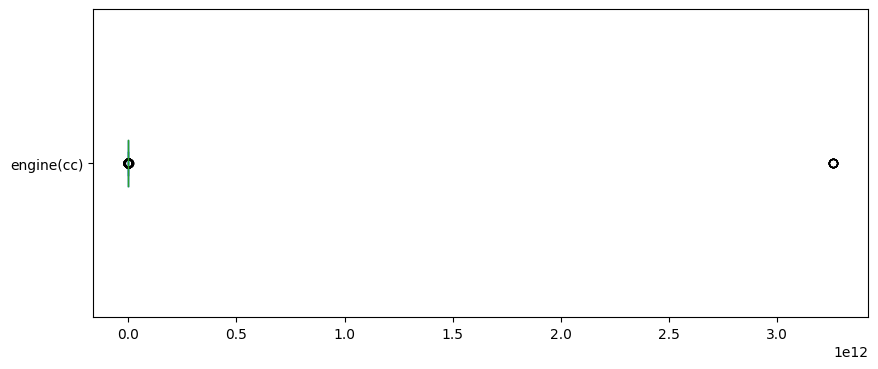

In [128]:
df['engine(cc)'].plot(kind='box', vert=False, figsize=(10,4))

<Axes: >

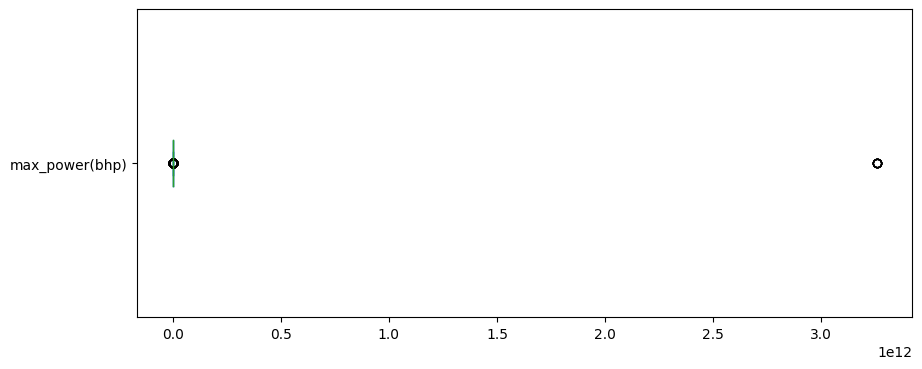

In [129]:
df['max_power(bhp)'].plot(kind='box', vert=False, figsize=(10,4))

In [130]:
max_value = df['engine(cc)'].max()
count_max_value = (df['engine(cc)'] == max_value).sum()
count_max_value
df.shape

(1553, 10)

In [131]:
filtered_df = df[df['engine(cc)'] != max_value]
filtered_df.shape

(1546, 10)

<Axes: >

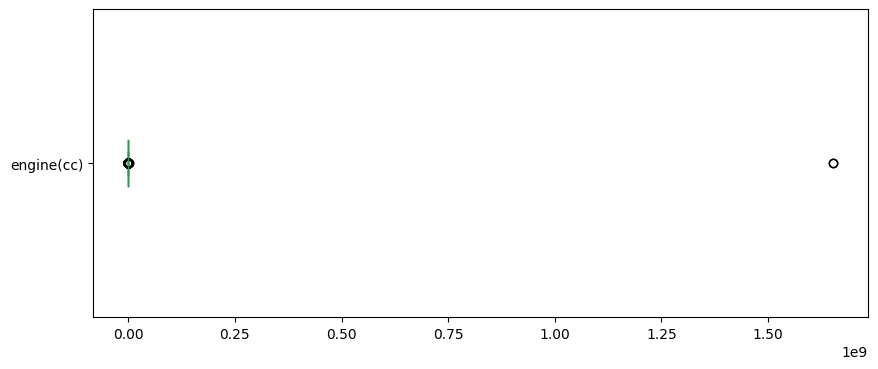

In [132]:
filtered_df['engine(cc)'].plot(kind='box', vert=False, figsize=(10,4))

In [133]:
q1 = df['engine(cc)'].quantile(q=0.25)
q3 = df['engine(cc)'].quantile(q=0.75)

IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

mask = (df['engine(cc)'] >= lower) & (df['engine(cc)'] <= upper)
df = df[mask]

<Axes: >

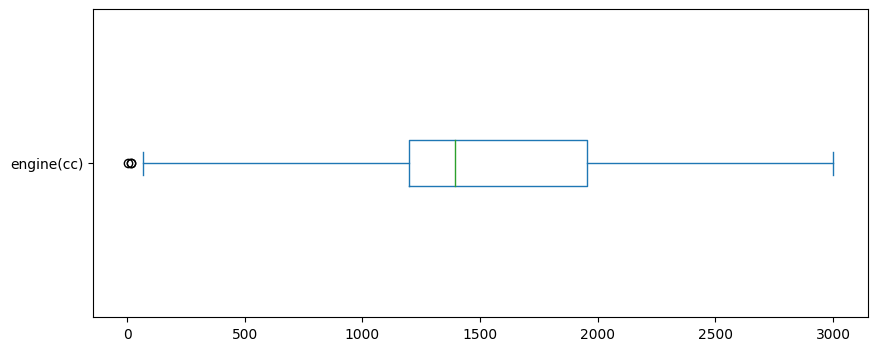

In [134]:
df['engine(cc)'].plot(kind='box', vert=False, figsize=(10,4))

<Axes: >

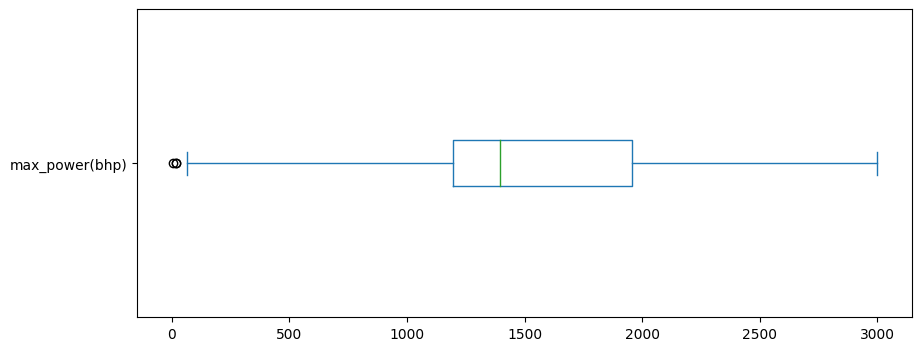

In [135]:
df['max_power(bhp)'].plot(kind='box', vert=False, figsize=(10,4))

In [136]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.420000e+03,1421.000000
mean,99.484166,53808.686840,130.361766,1496.418015,1496.418015,1.322962e+04,179.688417
std,2512.500438,40773.800809,407.348073,617.831868,617.831868,8.490127e+04,3636.650027
min,4.000000,1000.000000,7.810000,5.000000,5.000000,5.000000e+00,1.000000
25%,5.000000,30500.000000,16.100000,1197.000000,1197.000000,7.390000e+02,4.850000
50%,5.000000,50000.000000,18.600000,1395.000000,1395.000000,1.213000e+03,7.250000
75%,5.000000,70000.000000,21.190000,1956.000000,1956.000000,8.873000e+03,16.500000
max,67000.000000,810000.000000,3996.000000,2999.000000,2999.000000,1.186600e+06,95000.000000


In [137]:
y = df['price(in lakhs)']
X = df.drop(columns='price(in lakhs)')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

all_metrics["train_new"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test_new"] = get_metrics(y_test, y_pred)
all_metrics

,train,test,train_new,test_new
MAE,225.03,417.62,374.96,474.27
RMSE,2806.19,5380.90,3489.98,4112.15
R2,0.00,-0.00,0.00,0.01
